# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

# Этап 1

Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
data_games = pd.read_csv('games.csv')
data_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [3]:
data_games.shape

(16715, 11)

In [4]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Описание данных


* **Name** — название игры
* **Platform** — платформа
* **Year_of_Release** — год выпуска
* **Genre** — жанр игры
* **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
* **EU_sales** — продажи в Европе (миллионы проданных копий)
* **JP_sales** — продажи в Японии (миллионы проданных копий)
* **Other_sales** — продажи в других странах (миллионы проданных копий)
* **Critic_Score** — оценка критиков (максимум 100)
* **User_Score** — оценка пользователей (максимум 10)
* **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

### Вывод

Мы рассматриваем датафрейме 16715 записей, c 6 столбцами **dtypes** типа **float** и 5 столбцами типа **object**.

* Среди столбцов есть столбец с датами, также есть пропуски и здесь требуется предобработка данных;
* Далее следуют 4 столбца с данными продаж по регионам, рейтинг критикаов, рейтинг пользователей (требуется преобразование в **float**, так как тип данных этого столбца - **object**, что не позволит выполнять математические операции с этими данными);
* В последних трёх столбцах, также есть пропуски и тоже требуется предобработка;
* Все столбцы имеют названия, которые требуется привести к нижнему регистру.

# Этап 2

 ### Подготовьте данные
 
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
    * Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    * Опишите причины, которые могли привести к пропускам;
    * Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Проверим на дубликаты:

In [5]:
data_games.duplicated().sum()

0

Приведём все названия столбцов к нижнему регистру:

In [6]:
new_col = []
for i in data_games.columns:
    new_col.append(i.lower())
    
data_games.columns=new_col
data_games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
#data_games.columns = map(str.lower, data_games.columns)
#data_games.columns

В столбце **name** есть пропуски. Продажи этих игр должны быть учтены, возможно, остальные параметры тоже.

In [8]:
data_games[data_games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
data_games['name'] = data_games['name'].fillna('undefined')

data_games['name'].isna().sum()
#data_games[data_games['name'].isna()]['name'].count()

0

### Обработка year_of_release

Заполним пропуски текстом "0", а затем преобразуем **year_of_release** из **float** в **int**, а не в **datetime**, так как преобразование года в дату даст формат 01-01-YYYY, что может ввести в заблуждение при последующем чтении данных и привести к ложному заключению, что дата релиза - 1 января, хотя, это просто отсутствующие данные.

In [10]:
data_games['year_of_release'].isna().sum()

269

In [11]:
data_games['year_of_release'] = data_games['year_of_release'].fillna(0)
data_games['year_of_release'] = data_games['year_of_release'].apply(int)
print(data_games['year_of_release'].isna().sum())
data_games['year_of_release'].dtypes

0


dtype('int64')

In [12]:
data_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


Посмотрим какие жанры есть в списке, есть ли жанры которые не указали. Также есть 2 пропуска в этой колонке.

In [13]:
data_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

Поступим как и со столбцом **name**, заменим пропуски на **undefined**:

In [14]:
data_games['genre'] = data_games['genre'].fillna('undefined')
data_games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', 'undefined'], dtype=object)

Разберёмся с оценками критиков и игроков. Тут есть пропуски, заменим их на 0.0

Прежде ещё обратим внимание на тип данных. Оценки игроков имеют тип **object**, что следует изменить его на **float**.

In [15]:
data_games['critic_score'] = data_games['critic_score'].fillna(0.0)
data_games['critic_score']

0        76.0
1         0.0
2        82.0
3        80.0
4         0.0
         ... 
16710     0.0
16711     0.0
16712     0.0
16713     0.0
16714     0.0
Name: critic_score, Length: 16715, dtype: float64

Интересно, получается **'user_score'** имеет тип **object** не просто так, существуют ячейки содержащие значение 'tbd'.

Поскольку tbd - to be determined (discussed) означает, что оценки пока что нет, но  то можно заменить на 0:

In [16]:
data_games['user_score'] = data_games['user_score'].apply(lambda x: 0 if x=='tbd' else x)
# data_games['user_score'] = data_games.apply(lambda x: 0 if x['user_score']=='tbd' else x['user_score'], axis =1)
data_games['user_score'] = data_games['user_score'].fillna('0.0').apply(float)
data_games['user_score']

0        8.0
1        0.0
2        8.3
3        8.0
4        0.0
        ... 
16710    0.0
16711    0.0
16712    0.0
16713    0.0
16714    0.0
Name: user_score, Length: 16715, dtype: float64

Теперь обработаем данные в столбце **rating**. Неправильно было бы делать предположения по поводу игр в категории игр без рейтинга.
Заполним пропуски значением no rating:

In [17]:
data_games['rating'] = data_games['rating'].fillna('No rating')
data_games['rating'].unique()

array(['E', 'No rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Посмотрим что получилось:

In [18]:
data_games.info()
print(display(data_games))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,No rating
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,No rating
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,No rating
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,No rating
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,No rating
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,No rating


None


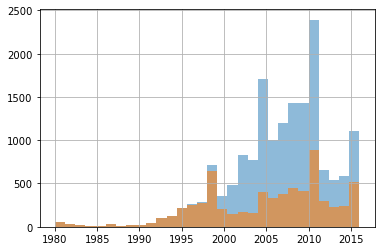

In [19]:
data_games[data_games['year_of_release'] != 0]['year_of_release'].hist(bins = 30, alpha=0.5);
data_games[(data_games['year_of_release'] != 0) & (data_games['rating'] == 'No rating')]['year_of_release'].hist(bins=30, alpha=0.6);

Интересно, что до 2000ых рейтинг игр практически полностью отсутствует. Возможно это связано с бурным развитием игровой индустрии, когда игры стали очень популярны и требовали наличие рейтинга на дисках и рекламах, так как они стали доступны для разных категорий игроков, от детей до взрослых, и их спрос, как и популярность, сильно возрос.


In [20]:
before2003_norating = data_games[ (data_games['year_of_release'] != 0) & (data_games['year_of_release'] < 2003) & (data_games['rating'] == 'No rating') ]['year_of_release'].count()
after2003_norating = data_games[ (data_games['year_of_release'] != 0) & (data_games['year_of_release'] >= 2003) & (data_games['rating'] == 'No rating') ]['year_of_release'].count()
print('Игр без рейтинга, выпущенных до 2003 года:', before2003_norating)
print('Игр без рейтинга, выпущенных после 2003 года:', after2003_norating)
print('----------------------')
before2003_all = data_games[(data_games['year_of_release'] != 0) & (data_games['year_of_release'] < 2003)]['year_of_release'].count()
after2003_all = data_games[(data_games['year_of_release'] != 0) & (data_games['year_of_release'] >= 2003)]['year_of_release'].count()

print('Всего игр выпущенных до 2003 года:', before2003_all)
print('Всего игр выпущенных после 2003 года:', after2003_all)
print('----------------------')
print('Доля игр без рейтинга до 2003 года: {:.1%}'.format(before2003_norating / before2003_all) )
print('Доля игр без рейтинга до 2003 года: {:.1%}'.format(after2003_norating / after2003_all) )

Игр без рейтинга, выпущенных до 2003 года: 2390
Игр без рейтинга, выпущенных после 2003 года: 4288
----------------------
Всего игр выпущенных до 2003 года: 3637
Всего игр выпущенных после 2003 года: 12809
----------------------
Доля игр без рейтинга до 2003 года: 65.7%
Доля игр без рейтинга до 2003 года: 33.5%


Возможные причины появления такого распределения:

- Возросшее количество ресурсов для оценки у ESRB ([в 2003 году](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board) ESRB оценила 8000 игр). Исходя из выборки, возможно, внимание к контролю за видеоиграми сильно возросло после 2000 года у организации во много раз прибавилось ресурсов и количество оценённых игр выросло.
- ESRB - это американская организация (США), однако, очень много игр популярны и разработаны вне США. Существуют другие организации, такие, как PEGI в Европе, или IARC по всему миру.
- Рейтинговым организациям стали уделять больше внимания и к рейтингу стали относиться гораздо более серьёзно как сами организации, так и разработчики видеоигр.

Добавим столбец с подсчётом общих продаж:

In [21]:
data_games['total_sales'] = data_games['na_sales'] + data_games['eu_sales'] + data_games['jp_sales'] + data_games['other_sales']
data_games.info()
print(display(data_games))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,No rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,No rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,No rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,No rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,No rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,No rating,0.01


None


### Вывод

Мы завершили первичную предобработку таблицы, далее нужно будет понять какой формат данных нужно будет преобразовать далее, либо изменить, чтобы выработать методологию создания подобных таблиц в будущем для удобства прогнозирования данных.

# Этап 3

### Проведите исследовательский анализ данных

* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

#### Cколько игр выпускалось в разные годы и важность за весь доступный период

Посмотрим сколько всего игр было выпущено за все годы исходя из предоставленной выборки:

In [22]:
len(data_games['name'].unique())

11560

Получим описание данных:

In [23]:
data_games[data_games['year_of_release'] != 0]['year_of_release'].describe().round(2)

count    16446.00
mean      2006.48
std          5.88
min       1980.00
25%       2003.00
50%       2007.00
75%       2010.00
max       2016.00
Name: year_of_release, dtype: float64

<AxesSubplot:>

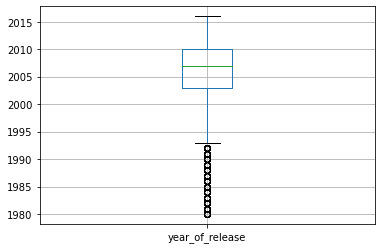

In [24]:
import matplotlib.pyplot as plt
data_games[data_games['year_of_release'] != 0].boxplot(['year_of_release'])

Само понятие квартили даёт понять, что 75% всех значений лежит после 2003 года, то есть за 13 последующих лет было создано
(в 3 раза) больше игр, чем за предыдущие 10 (с 1993).

In [25]:
print('Всего игр выпущенных до 2003 года:', data_games[(data_games['year_of_release'] < 2003)]['rating'].count())
print('Всего игр выпущенных до 2003 года:', data_games[(data_games['year_of_release'] >= 2003)]['rating'].count())

Всего игр выпущенных до 2003 года: 3906
Всего игр выпущенных до 2003 года: 12809


Во время предобработки мы выяснили, что 2003 - определённый рубеж для индустрии видеоигр. Важность индустрии можно также понять по прибыли, которая она приносят.

Построим гистограмму по годам:


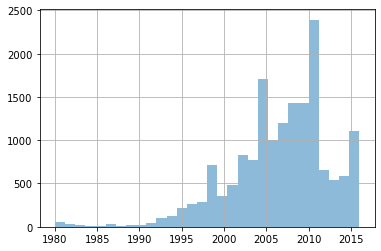

In [26]:
data_games[data_games['year_of_release'] != 0]['year_of_release'].hist(bins = 30, alpha=0.5);

Судя по графику, пики по количеству разработанных игр пришлись на 2004, 2010 и 2015 год. С упрощением разработки и появлением новых устройств выходит больше игр, а на "заре" индустрии примерно до 1994 года играть было почти не во что.

In [27]:
data_games_no_zero_years = data_games.query('year_of_release !=0').copy()

Чтобы построить график создадим таблицу по продажам. Исходя из таблицы, все столбцы, в которых есть слово sales - это продажи.
Соберём таблицу:

In [28]:
sales_total = data_games_no_zero_years[[x for x in data_games_no_zero_years.columns if 'sales' in x] + ['year_of_release']]
sales_total = sales_total.reset_index(drop = True)
sales_total

,na_sales,eu_sales,jp_sales,other_sales,total_sales,year_of_release
0,41.36,28.96,3.77,8.45,82.54,2006
1,29.08,3.58,6.81,0.77,40.24,1985
2,15.68,12.76,3.79,3.29,35.52,2008
3,15.61,10.93,3.28,2.95,32.77,2009
4,11.27,8.89,10.22,1.00,31.38,1996
...,...,...,...,...,...,...
16441,0.00,0.00,0.01,0.00,0.01,2016
16442,0.00,0.01,0.00,0.00,0.01,2006
16443,0.00,0.00,0.01,0.00,0.01,2016
16444,0.01,0.00,0.00,0.00,0.01,2003


In [29]:
sales_total.groupby('year_of_release').sum().shape

(37, 5)

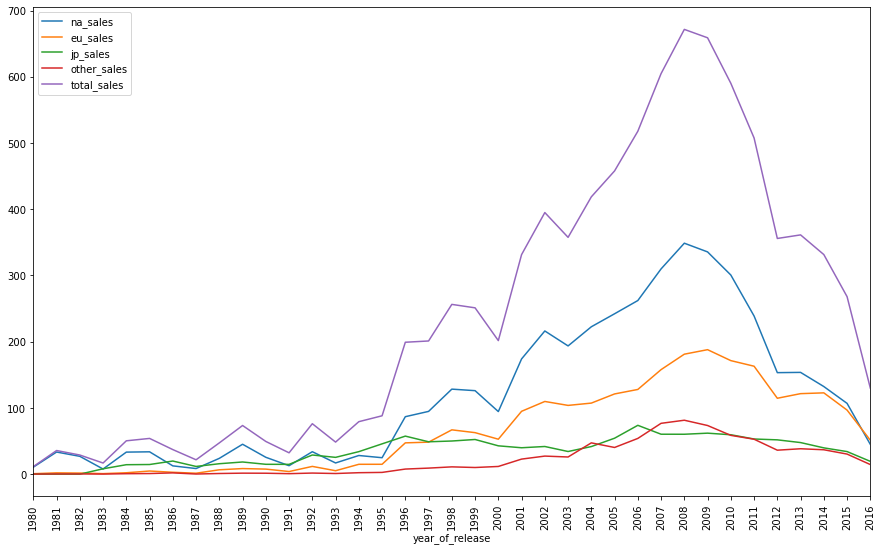

In [30]:
sales_total.groupby('year_of_release').sum().plot(rot=90, figsize=[15,9]);
plt.locator_params(axis='x', nbins=36);
plt.xlim(1980, 2016)
plt.legend(loc=2);

<ul>
    <li>Первая квартиль приходится на 2003 год, можно увидеть по графику выручки, что перелом тренда в total_sales произошёл в 1996 году, далее произошёл спад в 2000 и после этого происходил бурный рост вплоть до 2008 года.
    <li>2004 год - последний год конца Доткомов и последний год когда видеоигры стали присутствовать в том виде, в котором мы знаем их сейчас - игровые консоли, игры для PC, мобильные игры и тд.
</ul>
Все последующие манипуляции с данными мы будем производить исходя из этого заключения.

Хотя сложно утверждать достоверно, данная выборка визуально коррелирует с макроэкономическими трендами, такими, как Пузырь Доткомов или Финансовый кризис 2008 года, и, возможно, является репрезентативной для игровой индустрии. Спад после 2009 года в "традиционном" гейминге можно объяснить появлением мобильных игр и развитием сети LTE, что позволяет скачивать контент.

#### Вывод по важности доступных данных
<br>
Отвечая на вопрос "Важны ли данные за все периоды по играм?", можно ответить - нет, на графиках отчётливо видно смещение вправо, и важны только данные после 2004 года включительно.


#### Продажи по платформам

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Создадим таблицу с платформами, продажами и годами:

In [31]:
games_platforms = data_games_no_zero_years[['platform', 'total_sales', 'year_of_release']].query('year_of_release > 2003')
data_games_platforms_grouped = games_platforms.groupby(['platform','year_of_release']).sum()
data_games_platforms_grouped

total_sales
platform year_of_release             
3DS      2011                   63.20
         2012                   51.36
         2013                   56.57
         2014                   43.76
         2015                   27.78
...                               ...
XB       2008                    0.18
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[117 rows x 1 columns]

In [32]:
games_platforms_grouped = data_games_platforms_grouped.sort_values(['year_of_release', 'total_sales'], ascending=False)
games_platforms_grouped

,,total_sales
platform,year_of_release,
PS4,2016,69.25
XOne,2016,26.15
3DS,2016,15.14
PC,2016,5.25
WiiU,2016,4.60
...,...,...
XB,2004,65.42
GC,2004,28.82
DS,2004,17.27


In [33]:
games_platforms_grouped =games_platforms_grouped.reset_index(0).reset_index(0)
games_platforms_grouped

,year_of_release,platform,total_sales
0,2016,PS4,69.25
1,2016,XOne,26.15
2,2016,3DS,15.14
3,2016,PC,5.25
4,2016,WiiU,4.60
...,...,...,...
112,2004,XB,65.42
113,2004,GC,28.82
114,2004,DS,17.27
115,2004,PC,10.39


Выведем график продаж по каждой платформе, сгруппированной по годам. Используем контрастирующую цветовую схему:

In [34]:
import seaborn as sb

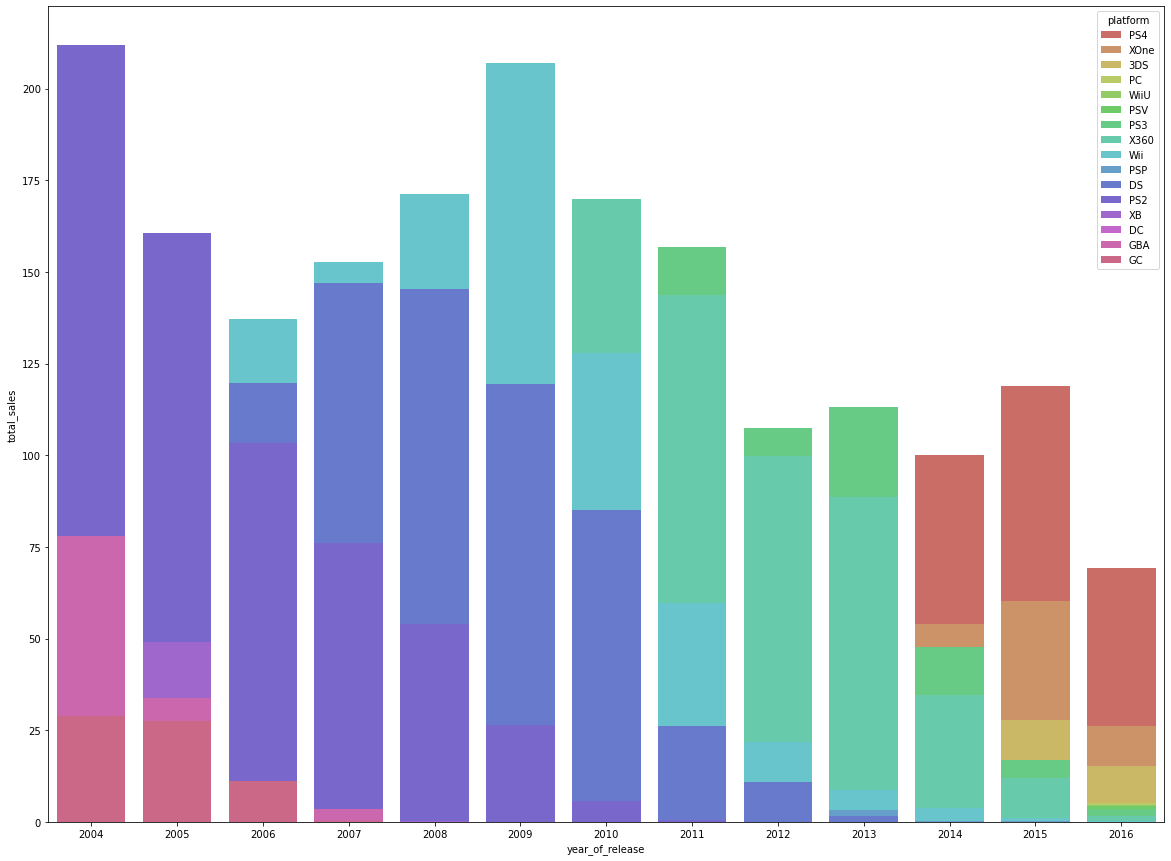

In [35]:
plt.figure(figsize=((20,15)))
sb.barplot(x='year_of_release', y='total_sales', hue='platform', data=games_platforms_grouped, palette='hls',dodge=False);

Единственное что может держать ту или иную платформу - это продажи игр под эту платформу. Добавим "продаваемость" консолей.


In [36]:
platform_lifespan = data_games_no_zero_years[['platform', 'total_sales', 'year_of_release']].query('year_of_release != 0').groupby(['platform', 'year_of_release']).sum()
platform_lifespan

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   28.88
         1983                    5.84
         1984                    0.27
...                               ...
XB       2008                    0.18
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[238 rows x 1 columns]

In [37]:
platform_lifespan = platform_lifespan.reset_index(0).reset_index(0)
platform_lifespan

,year_of_release,platform,total_sales
0,1980,2600,11.38
1,1981,2600,35.68
2,1982,2600,28.88
3,1983,2600,5.84
4,1984,2600,0.27
...,...,...,...
233,2008,XB,0.18
234,2013,XOne,18.96
235,2014,XOne,54.07
236,2015,XOne,60.14


Для нас важно узнать исторические данные, поэтому в этом случае мы добавили ещё 10 лет (с 1994):

In [38]:
platform_lifespan_final = platform_lifespan.groupby('platform').count().sort_values('year_of_release', ascending = False)
platform_lifespan_final = platform_lifespan_final.drop(columns = 'total_sales')
platform_lifespan_final.reset_index(0).head(10)

,platform,year_of_release
0,PC,26
1,GB,13
2,NES,12
3,X360,12
4,PSP,12
5,PS2,12
6,Wii,11
7,DS,11
8,PS3,11
9,2600,10


После всех преобразований столбец с названием **year_of_release** потерял свой смысл. 

Добавим его новой таблице и переименуем все столбцы:

In [39]:
year_of_platform_rel = data_games_no_zero_years[['platform', 'year_of_release']]
year_of_platform_rel

,platform,year_of_release
0,Wii,2006
1,NES,1985
2,Wii,2008
3,Wii,2009
4,GB,1996
...,...,...
16710,PS3,2016
16711,X360,2006
16712,PSV,2016
16713,GBA,2003


Создадим список соответствия платформы и даты релиза первой игры на нужно консоли:

In [40]:
year_of_release_new = year_of_platform_rel.groupby('platform').min()
year_of_release_new.head(10)

,year_of_release
platform,
2600,1980
3DO,1994
3DS,2011
DC,1998
DS,1985
GB,1988
GBA,2000
GC,2001
GEN,1990


In [41]:
year_of_release_new = year_of_release_new.reset_index(0)
year_of_release_new.head(10)

,platform,year_of_release
0,2600,1980
1,3DO,1994
2,3DS,2011
3,DC,1998
4,DS,1985
5,GB,1988
6,GBA,2000
7,GC,2001
8,GEN,1990
9,GG,1992


Сделаем наглядную таблицу в которой будет видно сколько жила каждая платформа:

In [45]:
platform_table = pd.merge(platform_lifespan_final, year_of_release_new, on='platform')
platform_table.head(10)

,platform,year_of_release_x,year_of_release_y
0,PC,26,1985
1,GB,13,1988
2,NES,12,1983
3,X360,12,2005
4,PSP,12,2004
5,PS2,12,2000
6,Wii,11,2006
7,DS,11,1985
8,PS3,11,2006
9,2600,10,1980


In [46]:
platform_table.columns = ['platform', 'years_of_sales', 'year_of_release']
platform_table.head(10)

,platform,years_of_sales,year_of_release
0,PC,26,1985
1,GB,13,1988
2,NES,12,1983
3,X360,12,2005
4,PSP,12,2004
5,PS2,12,2000
6,Wii,11,2006
7,DS,11,1985
8,PS3,11,2006
9,2600,10,1980


In [47]:
platform_table['years_of_sales'].describe().round(2)

count    31.00
mean      7.68
std       5.08
min       1.00
25%       4.00
50%       7.00
75%      11.00
max      26.00
Name: years_of_sales, dtype: float64

#### Вывод по продажам по платформам
Характерный срок существования платформы - около 7 лет. Картину слегка размывает PC как представитель, поскольку, хардвер можно апгрейдить, а вот хардвер консолей - нет, поэтому он остаётся в тренде долгое время, хотя, по факту, это разные платформы под одним названием. 
Однако, здесь не учитываются данные по мобильным играм, скорее всего, этот рынок более динамичен - новые смартфоны, операционные системы и прочие составляющие мобильной индустрии порой выходят чаще, чем раз в год.



**Актуальность периода**

Рынок гейминга (исходя из графиков, построенного на выборке) стремительно падает с 2009 года, поэтому для прогноза мы должны зафиксировать этот тренд, а исходя из актуальности данных в целом нужно взять период с 2013-2016 годы.

In [48]:
data_games_past_2013 = data_games.query('year_of_release > 2012')
data_games_past_2013.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,No rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,No rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,0.0,0.0,No rating,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,Misc,5.70,2.65,0.02,0.81,0.0,0.0,No rating,9.18
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


Посмотрим какие плаформы уже живут менее 7.7 лет (мы не хотим умирающих платформ) в прогнозе с 2017 года, плюс из-за гибкости PC добавим и эту строку:

In [49]:
uptodate_platforms = platform_table.query('year_of_release > 2009 or platform == "PC"')
uptodate_platforms

,platform,years_of_sales,year_of_release
0,PC,26,1985
18,3DS,6,2011
19,PSV,6,2011
20,WiiU,5,2012
23,PS4,4,2013
24,XOne,4,2013


In [50]:
uptodate_platforms = uptodate_platforms.sort_values('years_of_sales', ascending=True)
uptodate_platforms

,platform,years_of_sales,year_of_release
23,PS4,4,2013
24,XOne,4,2013
20,WiiU,5,2012
18,3DS,6,2011
19,PSV,6,2011
0,PC,26,1985


Довольно рискованно доверять разработку игрового проекта под платформу, которой статистически осталось жить год или два. В итоге, самыми перспективными наиболее вероятно окажутся PlayStation 4 и Xbox One. Это также видно по графикам по прибыльности. Однако, для разработки видеоигр этого мало. Важно посмотреть данные за последние три года (раз мы берём PS4 и Xbox One, что были выпущены в 2013 году, а сейчас 2016) по обороту.

Посмотрим прибыльность, выберем все платформы, у которых были продажи с 2013 года включительно:

In [51]:
platform_income = platform_lifespan.query('year_of_release > 2012').groupby('platform').sum()
platform_income =platform_income.drop(columns='year_of_release')
platform_income.reset_index(0)

,platform,total_sales
0,3DS,143.25
1,DS,1.54
2,PC,39.43
3,PS3,181.43
4,PS4,314.14
5,PSP,3.50
6,PSV,32.99
7,Wii,13.66
8,WiiU,64.63
9,X360,136.80


In [52]:
platform_income2 = pd.merge(platform_income, platform_table, on='platform', how='left')
platform_income2

,platform,total_sales,years_of_sales,year_of_release
0,3DS,143.25,6,2011
1,DS,1.54,11,1985
2,PC,39.43,26,1985
3,PS3,181.43,11,2006
4,PS4,314.14,4,2013
5,PSP,3.50,12,2004
6,PSV,32.99,6,2011
7,Wii,13.66,11,2006
8,WiiU,64.63,5,2012
9,X360,136.80,12,2005


In [53]:
platform_income2 = platform_income2.sort_values(['year_of_release'], ascending=False)
platform_income2 = platform_income2.reset_index(drop=True)
platform_income2

,platform,total_sales,years_of_sales,year_of_release
0,PS4,314.14,4,2013
1,XOne,159.32,4,2013
2,WiiU,64.63,5,2012
3,3DS,143.25,6,2011
4,PSV,32.99,6,2011
5,PS3,181.43,11,2006
6,Wii,13.66,11,2006
7,X360,136.80,12,2005
8,PSP,3.50,12,2004
9,DS,1.54,11,1985


In [54]:
platform_income_final = platform_income2.sort_values(['total_sales'], ascending=False)
platform_income_final = platform_income_final.reset_index(drop=True)
platform_income_final

,platform,total_sales,years_of_sales,year_of_release
0,PS4,314.14,4,2013
1,PS3,181.43,11,2006
2,XOne,159.32,4,2013
3,3DS,143.25,6,2011
4,X360,136.80,12,2005
5,WiiU,64.63,5,2012
6,PC,39.43,26,1985
7,PSV,32.99,6,2011
8,Wii,13.66,11,2006
9,PSP,3.50,12,2004


#### Вывод по продажам
Отвечая на поставленный вопрос: исходя из графика, и созданных выше таблиц, можно сделать вывод, что самые доходные за период с 2013 по 2016 годы включительно - это PS3, доходы которой разделяется PS4 из-за нового поколения консолей, то есть можно говрить о том, что игроки на этих консолях находятся в одной категории (если у человека есть PS4, то вероятнее всего ему нет необходимости иметь PS3, в отличии PC, так как бывают эксклюзивы для разных платформ), Xbox One, продажи которого также связаны со свеоим предшественником Xbox 360. Также можно отметить Nintendo 3DS, и Wii U как находящихся в топ-5 (если "объединить" значения PS3 и PS4, а также Xbox 360 и One).



#### Ящик с усами
Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам.

Для прогноза важен период с 2013 года. Посмотрим какие игры продавались за последние 4 года:

Попробуем составить сводную таблицу по всем играм и совместить их со всеми платформами после 2013 года:

In [55]:
g_comparison = data_games_past_2013[['name', 'platform', 'total_sales', 'year_of_release']]
g_comparison2 = g_comparison.pivot_table(index='name', columns='platform', values='total_sales', aggfunc=sum, fill_value=0)
g_comparison2

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
name,,,,,,,,,,,
Beyblade Burst,0.03,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
Fire Emblem Fates,1.67,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
Frozen: Olaf's Quest,0.59,0.51,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
Haikyu!! Cross Team Match!,0.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00
1/2 Summer +,0.00,0.00,0.0,0.0,0.00,0.01,0.00,0.00,0.0,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...
Zoo Tycoon (2013),0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.09,0.36
Zumba Fitness: World Party,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.23,0.0,0.00,0.24
Zyuden Sentai Kyoryuger: Game de Gaburincho!!,0.05,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00


In [56]:
g_comparison2['sum_total'] = g_comparison2.sum(axis =1)
g_comparison2

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne,sum_total
name,,,,,,,,,,,,
Beyblade Burst,0.03,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.03
Fire Emblem Fates,1.67,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.67
Frozen: Olaf's Quest,0.59,0.51,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,1.10
Haikyu!! Cross Team Match!,0.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.04
1/2 Summer +,0.00,0.00,0.0,0.0,0.00,0.01,0.00,0.00,0.0,0.00,0.00,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...
Zoo Tycoon (2013),0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.09,0.36,0.45
Zumba Fitness: World Party,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.23,0.0,0.00,0.24,0.47
Zyuden Sentai Kyoryuger: Game de Gaburincho!!,0.05,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.05


Совместить данные чтобы это ещё и визуально читалось не так проблематично. Построим boxplot отдельно платформы и их продажи:

In [58]:
top_platfroms = ['PC', 'PS3', 'PS4', 'X360', 'XOne', '3DS', 'WiiU']
platform_lifespan_sales = platform_lifespan[platform_lifespan['platform'].isin(top_platfroms)]
platform_lifespan_sales

,year_of_release,platform,total_sales
12,2011,3DS,63.20
13,2012,3DS,51.36
14,2013,3DS,56.57
15,2014,3DS,43.76
16,2015,3DS,27.78
...,...,...,...
224,2016,X360,1.52
234,2013,XOne,18.96
235,2014,XOne,54.07
236,2015,XOne,60.14


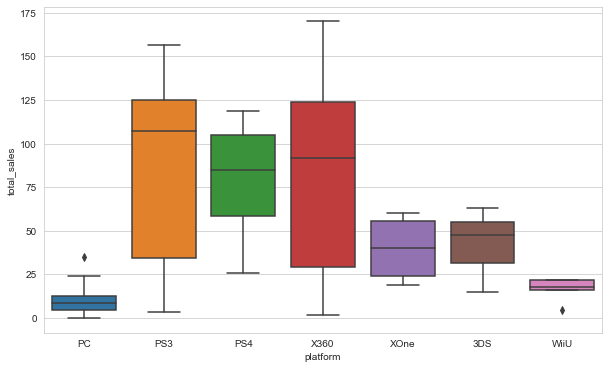

In [64]:
plt.figure(figsize=((10,6)))

sb.boxplot(x="platform", y="total_sales", data=platform_lifespan_sales, order=top_platfroms);

Посмотрим какую долю топовые по продажам игроки рынка занимают внутри себя:

In [69]:
platform_shares_sum = platform_lifespan_sales.groupby('platform').sum()
platform_shares_sum = platform_shares_sum.drop(columns='year_of_release')
platform_shares_sum = platform_shares_sum.reset_index(0)

In [70]:
platform_shares_sum

,platform,total_sales
0,3DS,257.81
1,PC,255.76
2,PS3,931.34
3,PS4,314.14
4,WiiU,82.19
5,X360,961.24
6,XOne,159.32


In [72]:
total_sales_top_platforms_sum = platform_shares_sum['total_sales'].sum().round(2)
total_sales_top_platforms_sum

2961.8

In [74]:
platform_shares_sum['platform_share'] = platform_shares_sum.apply(lambda x: x['total_sales'] / total_sales_top_platforms_sum, axis = 1).round(3)
platform_shares_sum.sort_values('platform_share', ascending=False)

,platform,total_sales,platform_share
5,X360,961.24,0.325
2,PS3,931.34,0.314
3,PS4,314.14,0.106
0,3DS,257.81,0.087
1,PC,255.76,0.086
6,XOne,159.32,0.054
4,WiiU,82.19,0.028


Посчитаем среднее:

In [75]:
platform_shares_mean = platform_lifespan_sales.groupby('platform').mean().drop(columns='year_of_release').reset_index().round(2)
platform_shares_mean.columns = ['platform', 'total_avg_sales']
platform_shares_mean.sort_values('total_avg_sales', ascending=False)

,platform,total_avg_sales
2,PS3,84.67
5,X360,80.10
3,PS4,78.54
0,3DS,42.97
6,XOne,39.83
4,WiiU,16.44
1,PC,9.84


### Вывод

4 платформы - PS3 и PS4, Xbox 360 и Xbox One - показывают наибольший разброс, а вместе с Nintendo 3DS это 84% продаж топовых строчек. Продажи Wii U и Nintendo 3DS "сложились" в масштабе собратьев. Сделаем вывод, что разница в продажах действительно велика - PlayStation и Xbox составляют львиную долю продаж по сравнению с остальными платформами.


### Влияние отзывов на продажи

Изучить как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Создадим таблицу в которой будут необходимые столбцы и сделаем выборку по платформам за последние 4 года на PlayStation 4:

In [93]:
def build_scatter_matrix(platform_name):
    df = data_games[['platform', 'total_sales', 'critic_score', 'user_score', 'year_of_release'
                    ]].query('platform == ' + platform_name + ' & year_of_release > 2012 & critic_score != 0 & user_score != 0')
    pd.plotting.scatter_matrix(df, figsize=(15,15));

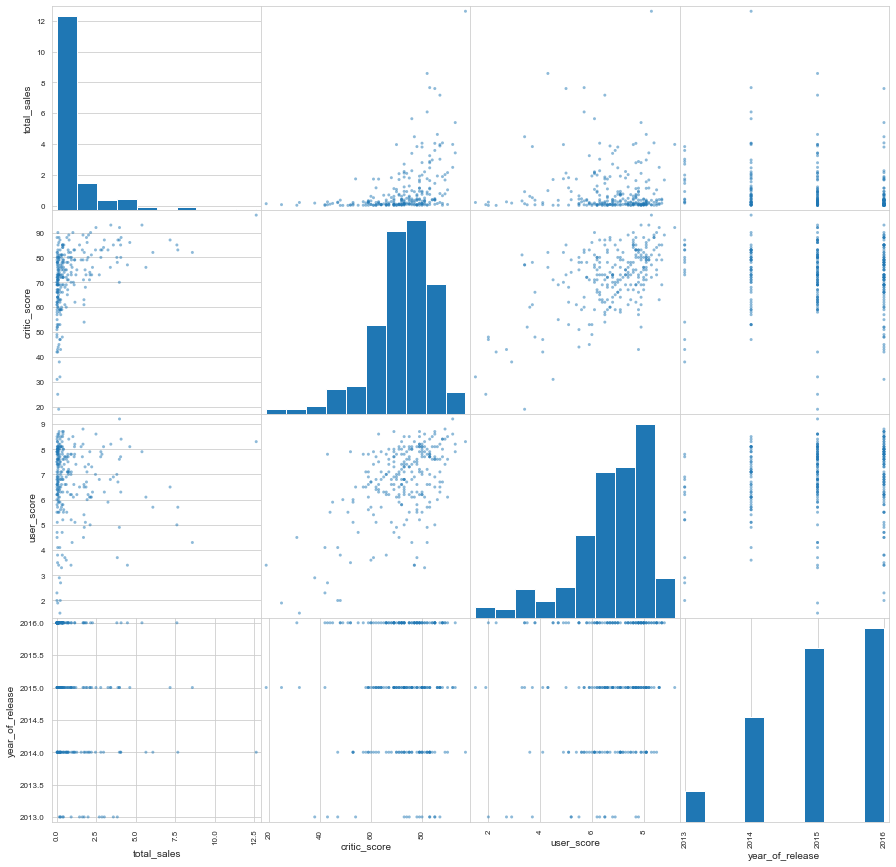

In [94]:
build_scatter_matrix('"PS4"')

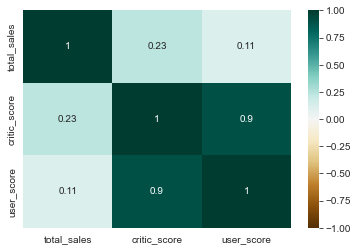

In [103]:
g_scatter_PS4 = data_games_past_2013[data_games_past_2013['platform'] == 'PS4']
sb.heatmap(g_scatter_PS4[['total_sales', 'critic_score', 'user_score']
                        ].corr(), annot=True, vmin=-1, vmax=1, cmap='BrBG');

Построим графики ещё по XOne:

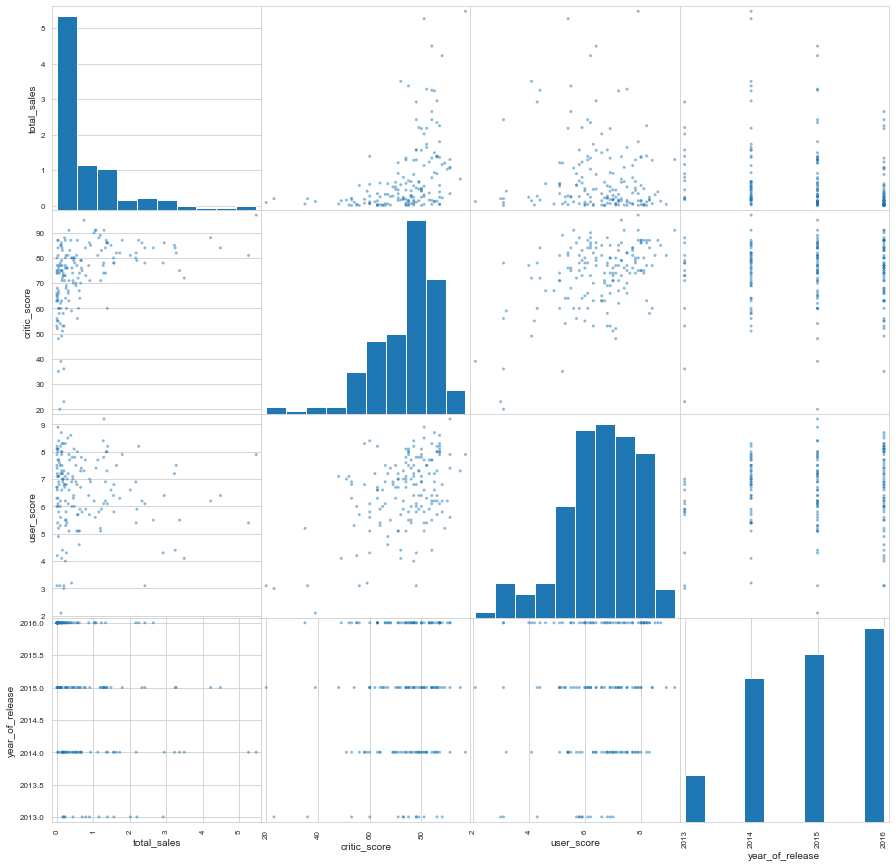

In [104]:
build_scatter_matrix('"XOne"')

и для PC:

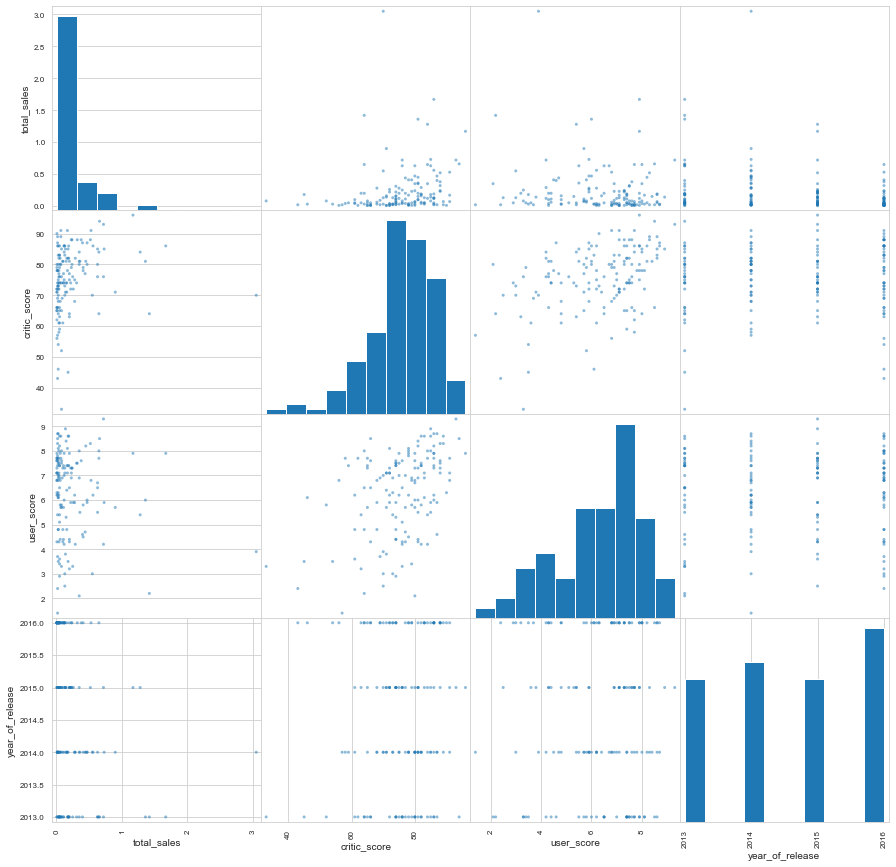

In [105]:
build_scatter_matrix('"PC"')

### Вывод

Отзывы на продажи не влияют, либо влияют очень слабо, судя по коэффициентам корреляции. Исходя из матрицы рассеяния, можно сделать интуитивно понятные выводы:

* Обычные пользователи оценивают игры очень резко, можно сказать что они более требовательны, их низкие оценки доминируют над низкими оценками критиков, но также они не стесняются ставить слишком высокие баллы. Оценки критиков же сдержанные и рассредоточены по всему диапазону, да и уничтожать игры низкими оценками они не привыкли и по оценкам выглядят как беспристрастные судьи.
* Игр с низкими продажами больше, чем игр с высокими.
* Игры с более высокими оценками критиков продаются лучше.
* В среднем в 2016 году игроки давали оценки выше - это можно связать с увеличением мощностей и оптимизацией различного рода процессов.
* Критики давали оценки в 2015 году выше, чем в 2016 - разумеется, потому что чем больше игр выходит, тем больше выходит и игр более низкого качества.
* Корреляции между продажами и оценкой критиков нет.

### Изучить общее распределение игр по жанрам

По нужному периоду (2013 - 2016) выделим данные:

In [106]:
g_genres = data_games_past_2013[['genre','total_sales', 'year_of_release']]
g_genres_data = g_genres.groupby('genre').sum().reset_index(0).sort_values('total_sales',ascending=False)
g_genres_data

,genre,total_sales,year_of_release
0,Action,321.87,1543186
8,Shooter,232.98,376687
10,Sports,150.65,431098
7,Role-Playing,145.89,588203
3,Misc,62.82,312231
4,Platform,42.63,149043
6,Racing,39.89,171240
2,Fighting,35.31,161153
1,Adventure,23.64,493536
9,Simulation,21.76,124901


Построим график:

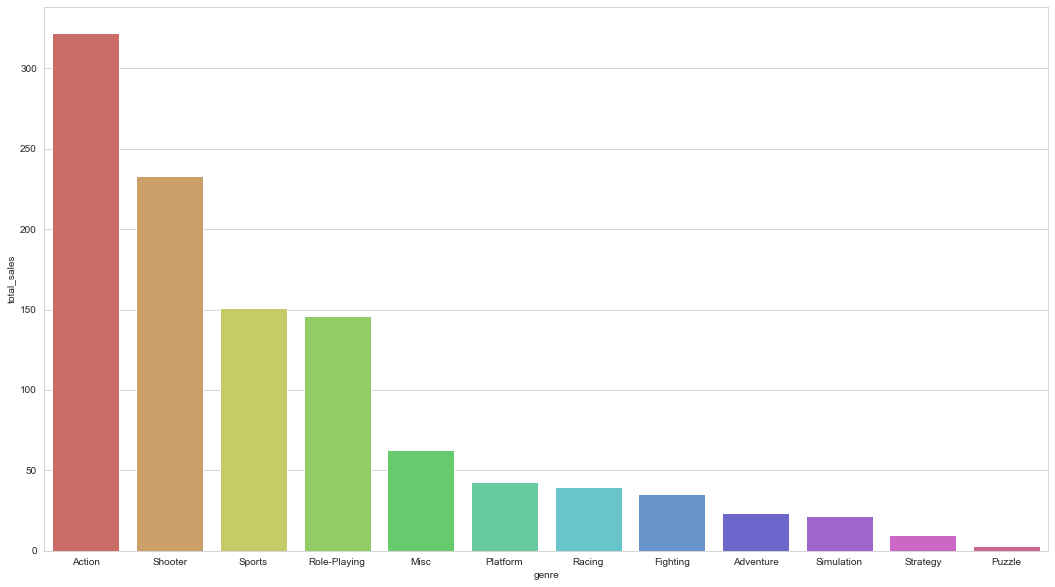

In [109]:
plt.figure(figsize=((18,10)))
sb.barplot(x="genre", y="total_sales", data=g_genres_data, palette='hls');

Самые популярные жанры - экшн, шутеры, спортивные и RPG. Сделаем по ним выборку чтобы посмотреть не только продажи, но и другие показатели: 

In [110]:
pop_genres = ['Action', 'Shooter', 'Sports', 'Role-Playing']
pop_genres_table = data_games_past_2013[['name', 'platform', 'genre', 'total_sales', 'critic_score', 'year_of_release']]
pop_genres_table2 = pop_genres_table[pop_genres_table['genre'].isin(pop_genres)]
pop_genres_table2

,name,platform,genre,total_sales,critic_score,year_of_release
16,Grand Theft Auto V,PS3,Action,21.05,97.0,2013
23,Grand Theft Auto V,X360,Action,16.27,97.0,2013
31,Call of Duty: Black Ops 3,PS4,Shooter,14.63,0.0,2015
33,Pokemon X/Pokemon Y,3DS,Role-Playing,14.60,0.0,2013
42,Grand Theft Auto V,PS4,Action,12.62,97.0,2014
...,...,...,...,...,...,...
16680,Kyoukai no Shirayuki,PSV,Action,0.01,0.0,2016
16691,Dynasty Warriors: Eiketsuden,PS3,Action,0.01,0.0,2016
16692,Metal Gear Solid V: Ground Zeroes,PC,Action,0.01,80.0,2014
16699,The Longest 5 Minutes,PSV,Action,0.01,0.0,2016


Посмотрим популярнейшие жанры по платформам и тенденции значений:

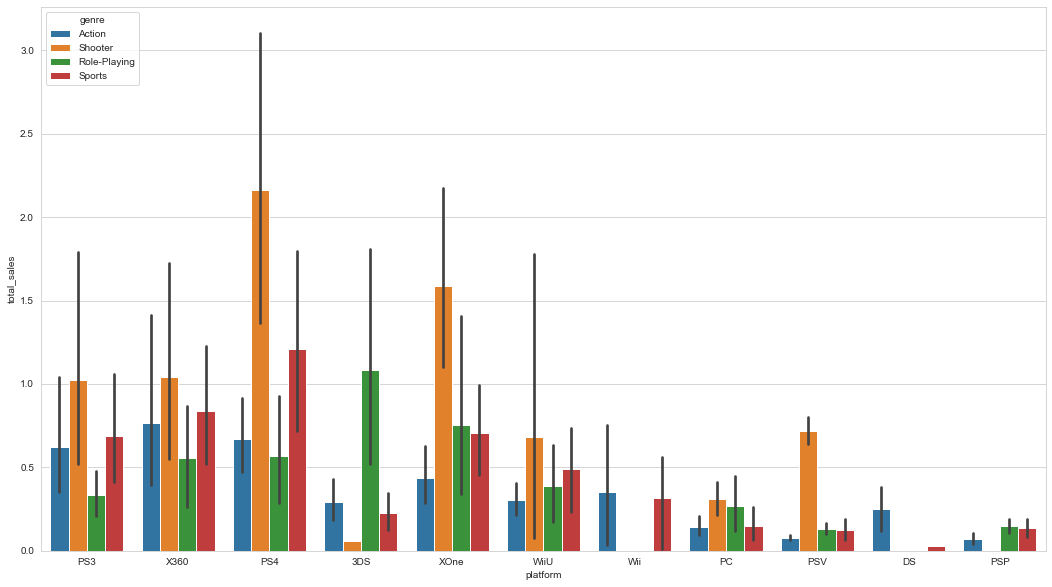

In [119]:
plt.figure(figsize=((18,10)))
sb.barplot(x="platform", y="total_sales", hue="genre",  data=pop_genres_table2);

Создадим heatmap по популярным платформам, жанрам и выручке за 2013-2016 годы:

In [121]:
pop_platform_genre_sales = pop_genres_table2.pivot_table(
                        index='genre', 
                        columns='platform', 
                        values='total_sales', 
                        aggfunc='sum').fillna(0)
pop_platform_genre_sales

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
genre,,,,,,,,,,,
Action,34.04,0.50,7.26,70.92,96.10,0.86,9.72,2.82,14.75,47.59,37.31
Role-Playing,67.37,0.00,4.87,16.49,28.99,1.03,10.23,0.00,1.93,4.43,10.55
Shooter,0.06,0.00,9.84,31.79,88.56,0.00,1.44,0.00,5.48,35.48,60.33
Sports,1.82,0.03,1.96,32.35,55.61,0.69,2.08,0.95,2.46,25.96,26.74


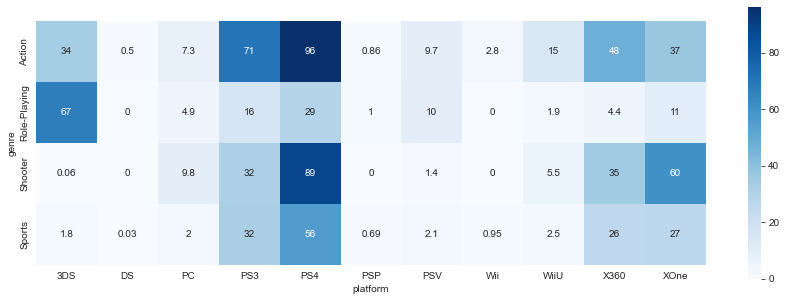

In [152]:
plt.subplots(figsize=(15,5))
sb.heatmap(pop_platform_genre_sales,cmap="Blues", annot=True, square=True);

### Вывод

Самая показательная часть с графиком по таблице с продажами отображает тенденции рынка - экшн, RPG, шутеры, спортивные игры. Построив категориальный график со средними значениями и наложенными доверительными интервалами, можно сказать, что наиболее сильный разброс у шутеров на PS4, и Xbox One, а в среднем шутеры зарабатывают больше на отдельных платформах, а на каких-то платформах отсутствуют вовсе.

Изучив heatmap, легко увидеть лидеров:

* Nintendo 3DS - это экшн и RPG;
* PlayStation (3 и 4 поколения) - экшн, шутер и спортивные видеоигры;
* Xbox (360 и One) - экшн, шутер и спортивные видеоигры.

# Этап 4

### Составьте портрет пользователя каждого региона

Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Автоматизируем получение одинаковых данных по топ-5 мест:

In [163]:
def get_top_5_sales(region_name):
    sales_top_5 = data_games_past_2013[['platform', region_name, 'genre']]
    sales_top_5_platform = sales_top_5.groupby('platform').sum().sort_values(region_name, ascending=False).reset_index()[:5]
    sales_top_5_genre = sales_top_5.groupby('genre').sum().sort_values(region_name, ascending=False).reset_index()[:5]
    figsize_graph = [10,6]
    palette = "Blues"
    plt.figure(figsize=figsize_graph)
    sb.barplot(x="platform", y=region_name, palette=palette, data=sales_top_5_platform);
    plt.show()
    plt.figure(figsize=figsize_graph)
    sb.barplot(x="genre", y=region_name, palette=palette, data=sales_top_5_genre);
    plt.show()

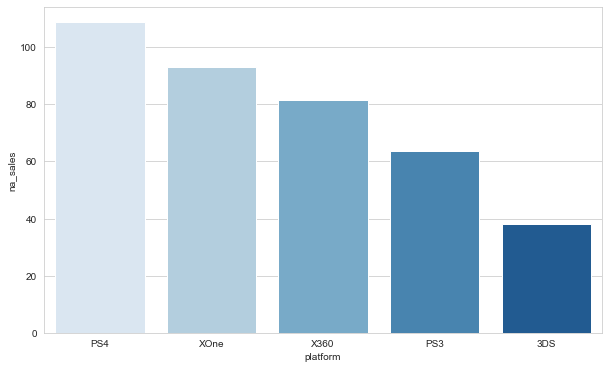

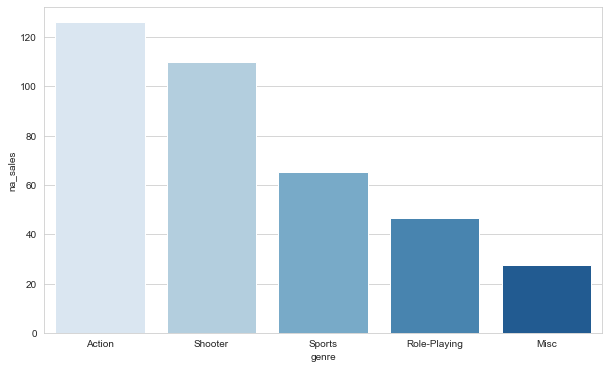

In [165]:
get_top_5_sales('na_sales')

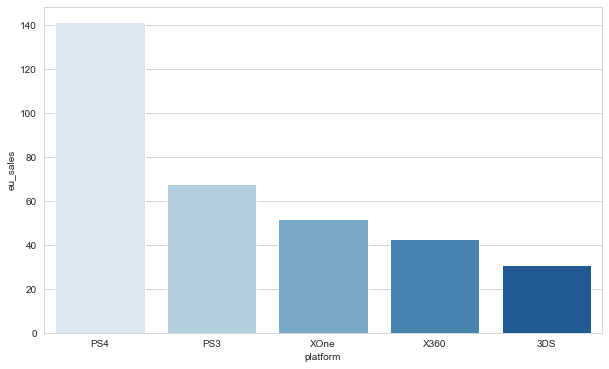

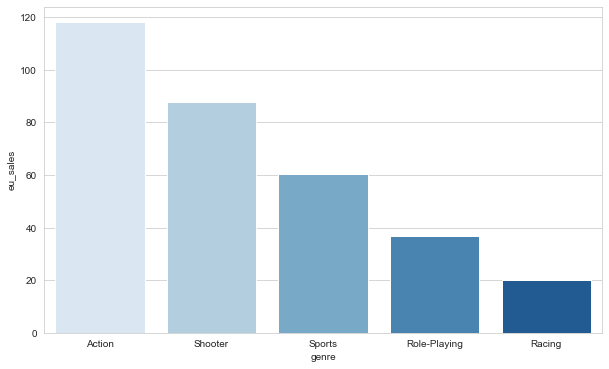

In [166]:
get_top_5_sales('eu_sales')

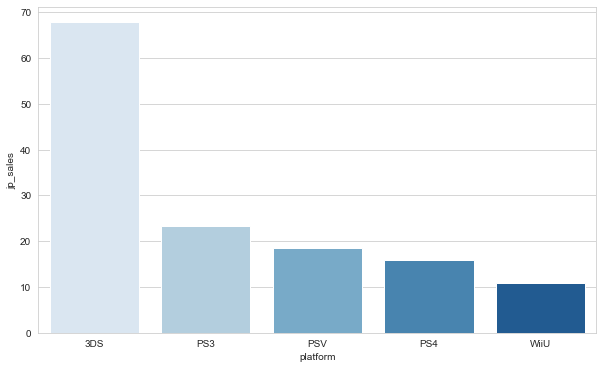

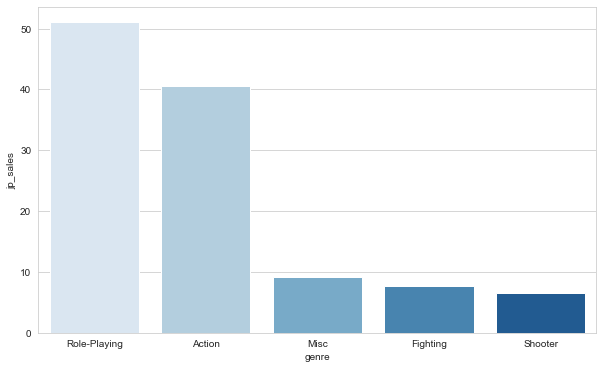

In [167]:
get_top_5_sales('jp_sales')

#### Описание разницы в лидерах по платформам и жанрам по регионам

* Два абсолютных лидера по продажам - PlayStation и Xbox являются хорошо закрепившимися игроками в Североамериканском регионе, где пользователи редко когда хотят менять консоль, тогда как в Европе, абсолютным лидером являются PS4 (из семейства PlayStation) - более новая модель - покупатели предпочитают более свежую графику и готовы покупать игры под более новые консоли. Североамериканские и европейские пользователи предпочитают играть на стационарных консолях, а в Японии пользователи предпочитают персональные девайсы - в топе мобильные платформы для гейминга: Nintendo 3DS, PS Vita и Wii U.
* Если в Северной Америке и Европе преподпчитают игры как бытовое времяпрепровождение и (экшн, шутеры, спортивные), то в Японии role-playing и экшн игры наиболее популярны - эти игры в основном ролевые.

#### Влияние рейтинга ESRB на продажи в отдельных регионах

Оставим продажи и рейтинг, посчитаем корреляцию:

In [169]:
na_esrb = data_games_past_2013[['na_sales', 'rating']].groupby('rating').sum()
eu_esrb = data_games_past_2013[['eu_sales', 'rating']].groupby('rating').sum()
jp_esrb = data_games_past_2013[['jp_sales', 'rating']].groupby('rating').sum()

In [170]:
esrb_table = pd.merge(na_esrb, eu_esrb, on='rating', how='left')
esrb_table

,na_sales,eu_sales
rating,,
E,79.05,83.36
E10+,54.24,42.69
M,165.21,145.32
No rating,89.42,78.91
T,49.79,41.95


In [171]:
esrb_table_final = pd.merge(esrb_table, jp_esrb, on='rating', how='left')
esrb_table_final

,na_sales,eu_sales,jp_sales
rating,,,
E,79.05,83.36,15.14
E10+,54.24,42.69,5.89
M,165.21,145.32,14.11
No rating,89.42,78.91,85.05
T,49.79,41.95,20.59


Построим график:

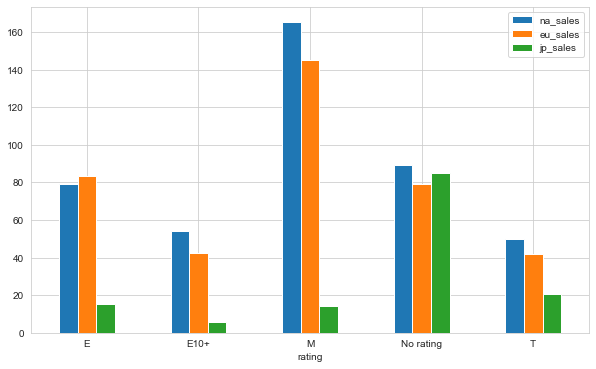

In [179]:
esrb_table_final.plot.bar(rot =0, figsize=[10,6]);

### Вывод

В США и Европе продажи распределены по рейтингам примерно одинаково - игры с рейтингом M (mature, 17+) пользуются основным спросом, это хорошо соотносится с распределением по жанрам - шутеры и экшн попадают в эту категорию. Если же посмотреть на японские продажи, то интересно, что основная доля приходится на игры без рейтинга. Это возможно, обусловлено тем, что ESRB входит в IARC, а в Японии это регулируется отдельным органом CERO - они пользуются отдельной системой рейтинга, которая не соотносится с системой рейтинга ESRB / IARC. Тем не менее, игры для тинейджеров у них более популярны. Скорее всего, RPG попадает в категорию игр с маркировкой "Т" (по версии ESRB). Вполне возможно, что игры, созданные для Японского рынка, слишком специфичны для этого рынка, поэтому большая часть не выходит на международной рынок и, соответственно, разработчики не считают целесообразным получать международный рейтинг.

# Этап 5

### Проверьте гипотезы

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение alpha.

Поясните:
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.

Формулирование гипотез и p-value:

* Для проверки гипотез мы использовали p-value, то есть вероятность получить для данной вероятностной модели распределения значений случайной величины такое же или более экстремальное значение статистики, по сравнению с ранее наблюдаемым, при условии, что нулевая гипотеза верна.
* Гипотезы формулируются так, чтобы в нулевой всегда использовать знак равенства, а альтернативная утверждает обратное.

Сформулируем нулевую и альтернативную гипотезы, которые уже заданы в вопросах к заданию:
<br>
$H_0$: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.<br>
$H_1$: Средние пользовательские рейтинги платформ Xbox One и PC отличаются .<br>

In [189]:
from scipy import stats as st

In [190]:
def test_hypothesis(sample1, sample2, alpha):
    results = st.ttest_ind(sample1, sample2, equal_var = False)
    print('p-значение:', results.pvalue)
    if (results.pvalue < alpha):
        return "Отвергаем нулевую гипотезу"
    else:
        return "Не получилось отвергнуть нулевую гипотезу"

Тем лучше результаты, чем больше выборка. Постараемся получить максимально возможные списки:

In [182]:
sample_xbox = data_games_past_2013.query('platform == "XOne"')['user_score']
sample_xbox.describe().round(2)

count    247.00
mean       4.81
std        3.11
min        0.00
25%        0.00
50%        6.00
75%        7.20
max        9.20
Name: user_score, dtype: float64

PC:

In [183]:
sample_pc = data_games_past_2013.query('platform == "PC"')['user_score']
sample_pc.describe().round(2)

count    189.00
mean       5.14
std        2.88
min        0.00
25%        3.50
50%        6.00
75%        7.40
max        9.30
Name: user_score, dtype: float64

In [187]:
import random

In [192]:
sample_xbox_rnd = random.sample(list(sample_xbox), len(list(sample_pc)))
test_hypothesis(sample_pc, sample_xbox_rnd, 0.05)

p-значение: 0.22277649218188034


'Не получилось отвергнуть нулевую гипотезу'

Кажется, игроманы на PC привыкли и к Windows, и к Xbox One - оценки на обеих платформах примерно равны. P-value достаточно велико, чтобы не тестировать его на более низких значениях.

Сформулируем нулевую и альтернативную гипотезы, которые уже заданы в вопросах к заданию:
<br>
$H_0$: Средние пользовательские рейтинги жанров Action и Sports одинаковы.<br>
$H_1$: Средние пользовательские рейтинги жанров Action и Sports разные.<br>

Action:

In [205]:
sample_action = data_games_past_2013.query('genre == "Action"& user_score != 0')['user_score']
sample_action.describe().round(2)

count    389.00
mean       6.84
std        1.33
min        2.00
25%        6.30
50%        7.10
75%        7.80
max        9.10
Name: user_score, dtype: float64

Sports:

In [206]:
sample_sports = data_games_past_2013.query('genre == "Sports" & user_score != 0')['user_score']
sample_sports.describe().round(2)

count    160.00
mean       5.24
std        1.78
min        0.20
25%        4.10
50%        5.50
75%        6.50
max        8.80
Name: user_score, dtype: float64

In [207]:
sample_action_rnd = random.sample(list(sample_action), len(list(sample_sports)))

In [208]:
test_hypothesis(sample_sports, sample_action_rnd, 0.05)

p-значение: 4.805884493906963e-19


'Отвергаем нулевую гипотезу'

### Вывод

Выводы по гипотезам:

* Оценки пользователей на PC и Xbox One примерно равны.
* Пользователи по разному оценивают жанры Action и Sports. В частности, жанр Sports оценивается игроками ниже, чем Action.


# Этап 6

### Общий вывод

Цель проекта: выработать методологию для прогнозирования на следующий год (X + 1) находясь в годе X, имея на руках исторические данные за широкий горизонт. 
1. Требутеся выделить актуальный период, как минимум от 3 (если данные за год X неполные) до 4 лет;
2. Выделить топовые игры, посчитать их долю, построить графики и посмотреть что именно происходило в продажах игр за эти годы на каждом рынке.
3. Важно выделить жанр, рынок и платформу, учесть особенности при создании игры.
4. Учесть, что несмотря на то, что оценка критиков, которым можно дать "попробовать" разрабатываемые игры в бете могут не отражать мнение игроков. 
5. Оценки не влияют на продажи.

Все эти данные помогут создать прогноз на ближайший финансовый (фискальный) год.